In [ ]:
from project2.util.graphmaker import GraphMaker

graph1 = GraphMaker(35)
graph1.plot()

In [ ]:
graph2 = GraphMaker(35)
graph2.plot()

In [ ]:
graph1.export(graph1_fp)
graph2.export(graph2_fp)

In [1]:
graph1_pairs = [('D', ('AE',)), ('D', ('AG',)), ('O', 'A'), ('I', 'X'), ('W', 'H'),
    ('D', ('AE', 'AG')), ('D', ('AG', 'A')), ('O', ('A', 'X')), ('I', ('X', 'H')), ('W', ('H', 'AG'))]
graph2_pairs = [('I', 'V'), ('H', 'K'), ('AB', 'Y'), ('C', 'O'), ('R', ('AF',)),
    ('I', ('V', 'K')), ('H', ('K', 'Y')), ('AB', ('Y', 'O')), ('C', ('O', 'AF')), ('R', ('AF', 'V'))]

In [2]:
from project2.graph import Graph
from project2.search import Searcher
import warnings
warnings.filterwarnings('ignore')

In [3]:
graph1_fp = '/home/anthony/src/school/cs570/cs570/project2/graphs/graph1.txt'
graph2_fp = '/home/anthony/src/school/cs570/cs570/project2/graphs/graph2.txt'

graph1 = Graph(graph1_fp)
graph2 = Graph(graph2_fp)

In [4]:
import pandas as pd
df = pd.DataFrame(columns=['Graph', 'Algorithm', 'Heuristic', 'Start', 'Goal(s)', 'Cost', 'Explored',
                           'avg_open', 'max_open', 'avg_depth', 'max_depth', 'avg_branching'])

In [ ]:
print(df)

In [5]:
for i, graph in enumerate((graph1, graph2)):
    for algorithm in ('BFS', 'DFS', 'BEST', 'IDS'):
        for pair in (graph1_pairs, graph2_pairs)[i]:
            searcher = Searcher(graph, algorithm, pair[0], pair[1])
            searcher.search()
            d = {
                'Graph': graph.file,
                'Algorithm': searcher.algorithm,
                'Heuristic': 'N/A',
                'Start': pair[0],
                'Goal(s)': pair[1],
                'Cost': searcher.current_node.cost,
                'Explored': searcher.expansions_taken,
                'avg_open': searcher.avg_open,
                'max_open': searcher.max_open,
                'avg_depth': searcher.avg_depth,
                'max_depth': searcher.max_depth,
                'avg_branching': searcher.avg_branching
            }
            df = df.append(d, ignore_index=True)

You have asked for a/an 'BFS' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/graph1.txt.'
Your start node is '(D, 0.00)' and your goal(s) are '[(AE, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

ENDED HERE:
LABEL: AE
PATH: [(D, 0.00), (AG, 132.00), (P, 827.00), (AE, 1189.00)]
COST: 1189

STATS:
AVG_OPEN: 15.04
MAX_OPEN: 22.00

AVG_DEPTH: 3.04
MAX_DEPTH: 4.00

AVG_BRANCHING_FACTOR: 5.00
You have asked for a/an 'BFS' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/graph1.txt.'
Your start node is '(D, 0.00)' and your goal(s) are '[(AG, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

ENDED HERE:
LABEL: AG
PATH: [(D, 0.00), (AG, 132.00)]
COST: 132

STATS:
AVG_OPEN: 3.00
MAX_OPEN: 5.00

AVG_DEPTH: 1.67
MAX_DEPTH: 2.00

AVG_BRANCHING_FACTOR: 3.33
You have asked for a/an 'BFS' type search to be

You have asked for a/an 'IDS' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/graph2.txt.'
Your start node is '(H, 0.00)' and your goal(s) are '[(K, 0.00), (Y, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

ENDED HERE:
LABEL: K
PATH: [(H, 0.00), (A, 94.00), (C, 203.00), (K, 390.00)]
COST: 390

STATS:
AVG_OPEN: 6.44
MAX_OPEN: 10.00

AVG_DEPTH: 3.78
MAX_DEPTH: 6.00

AVG_BRANCHING_FACTOR: 4.56
You have asked for a/an 'IDS' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/graph2.txt.'
Your start node is '(AB, 0.00)' and your goal(s) are '[(Y, 0.00), (O, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

ENDED HERE:
LABEL: O
PATH: [(AB, 0.00), (AE, 110.00), (AA, 309.00), (V, 927.00), (AD, 1127.00), (O, 1306.00)]
COST: 1306

STATS:
AVG_OPEN: 8.08
MAX_OPEN: 14.00

AVG_DEPTH: 3.42
MAX_DEPTH: 6.00

AV

In [ ]:
print(df)

In [6]:
df.to_csv('/home/anthony/test.csv')

In [7]:
for i, graph in enumerate((graph1, graph2)):
    for heuristic in ('SLD', 'DIR'):
        for pair in (graph1_pairs, graph2_pairs)[i]:
            searcher = Searcher(graph, 'A*', pair[0], pair[1], heuristic=heuristic)
            searcher.search()
            d = {
                'Graph': graph.file,
                'Algorithm': 'A*',
                'Heuristic': heuristic,
                'Start': pair[0],
                'Goal(s)': pair[1],
                'Cost': searcher.current_node.cost,
                'Explored': searcher.expansions_taken,
                'avg_open': searcher.avg_open,
                'max_open': searcher.max_open,
                'avg_depth': searcher.avg_depth,
                'max_depth': searcher.max_depth,
                'avg_branching': searcher.avg_branching
            }
            df = df.append(d, ignore_index=True)

You have asked for a/an 'A*' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/graph1.txt.'
Heuristic 'SLD' will be used.
Your start node is '(D, 0.00)' and your goal(s) are '[(AE, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

ENDED HERE:
LABEL: AE
PATH: [(D, 0.00), (W, 905.82), (M, 927.97), (X, 957.32), (Q, 981.43), (AE, 997.00)]
COST: 997

STATS:
AVG_OPEN: 9.60
MAX_OPEN: 15.00

AVG_DEPTH: 3.60
MAX_DEPTH: 6.00

AVG_BRANCHING_FACTOR: 4.87
You have asked for a/an 'A*' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/graph1.txt.'
Heuristic 'SLD' will be used.
Your start node is '(D, 0.00)' and your goal(s) are '[(AG, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

ENDED HERE:
LABEL: AG
PATH: [(D, 0.00), (AG, 132.00)]
COST: 132

STATS:
AVG_OPEN: 2.00
MAX_OPEN: 4.00

AVG_DEPTH: 1.50
MAX_DEPTH: 

In [ ]:
print(df)

In [8]:
df.to_csv('/home/anthony/src/school/cs570/cs570/project2/presentation_data.csv')

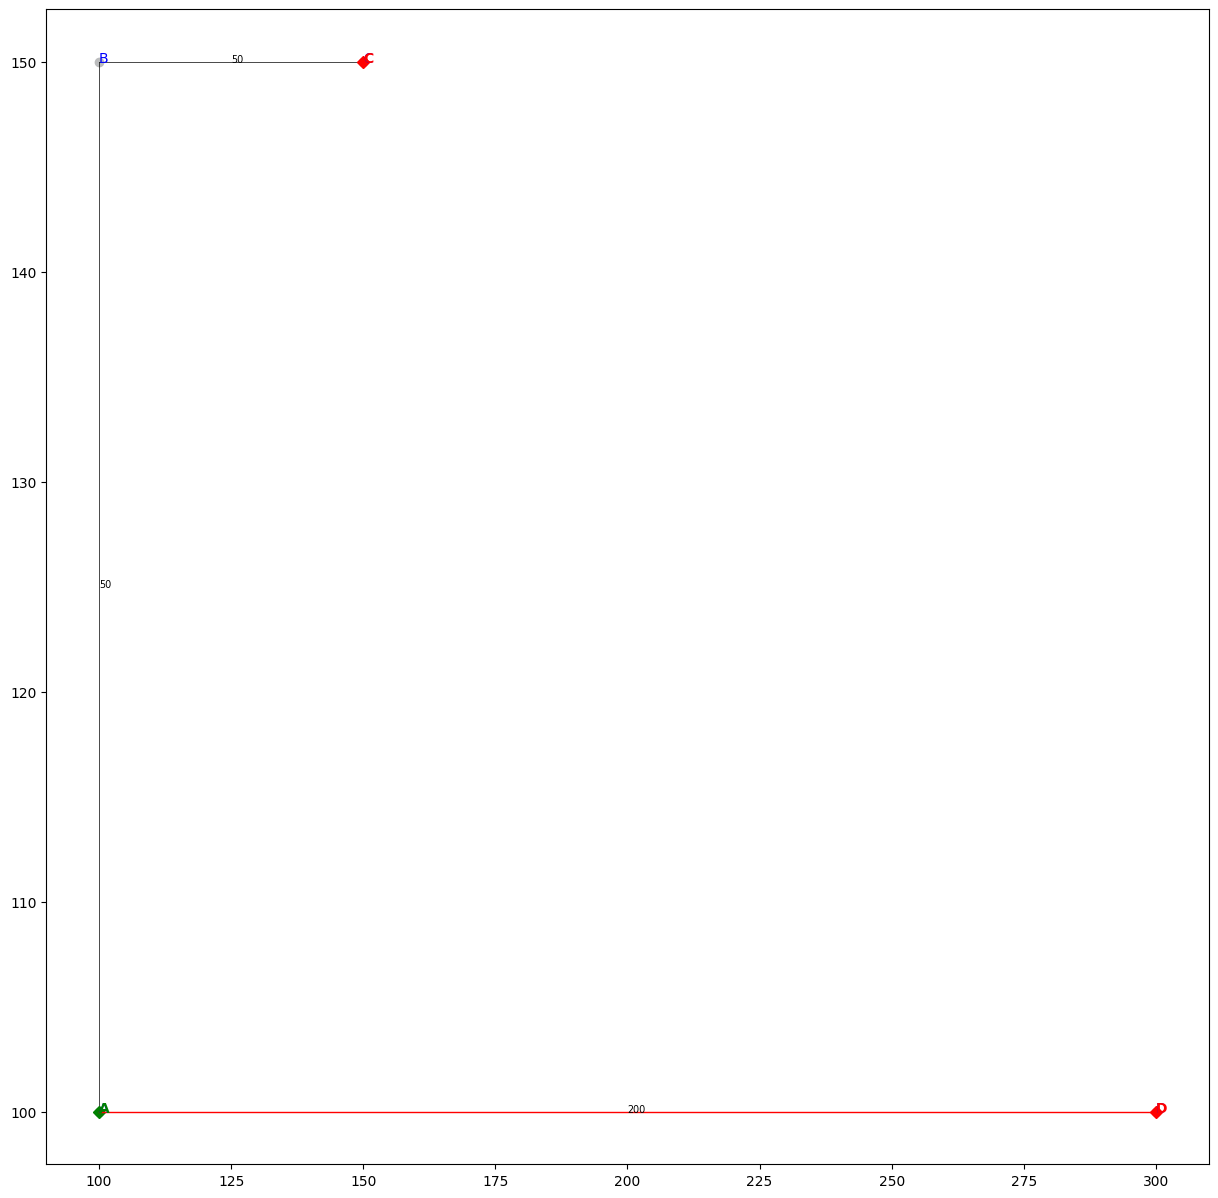

ENDED HERE:
LABEL: D
PATH: [(A, 0.00), (D, 200.00)]
COST: 200

STATS:
AVG_OPEN: 0.50
MAX_OPEN: 1.00

AVG_DEPTH: 1.50
MAX_DEPTH: 2.00

AVG_BRANCHING_FACTOR: 1.00


In [25]:
%matplotlib inline
from project2.util.graphviz import GraphViz

graph_fp = '/home/anthony/src/school/cs570/cs570/project2/graphs/dirdumb.txt'

graph = Graph(graph_fp)
graph_viz = GraphViz()
graph_viz.loadGraphFromFile(graph_fp)

Searcher(graph, 'A*', 'A', ['C', 'D'], heuristic='DIR', graph_viz=graph_viz).search()

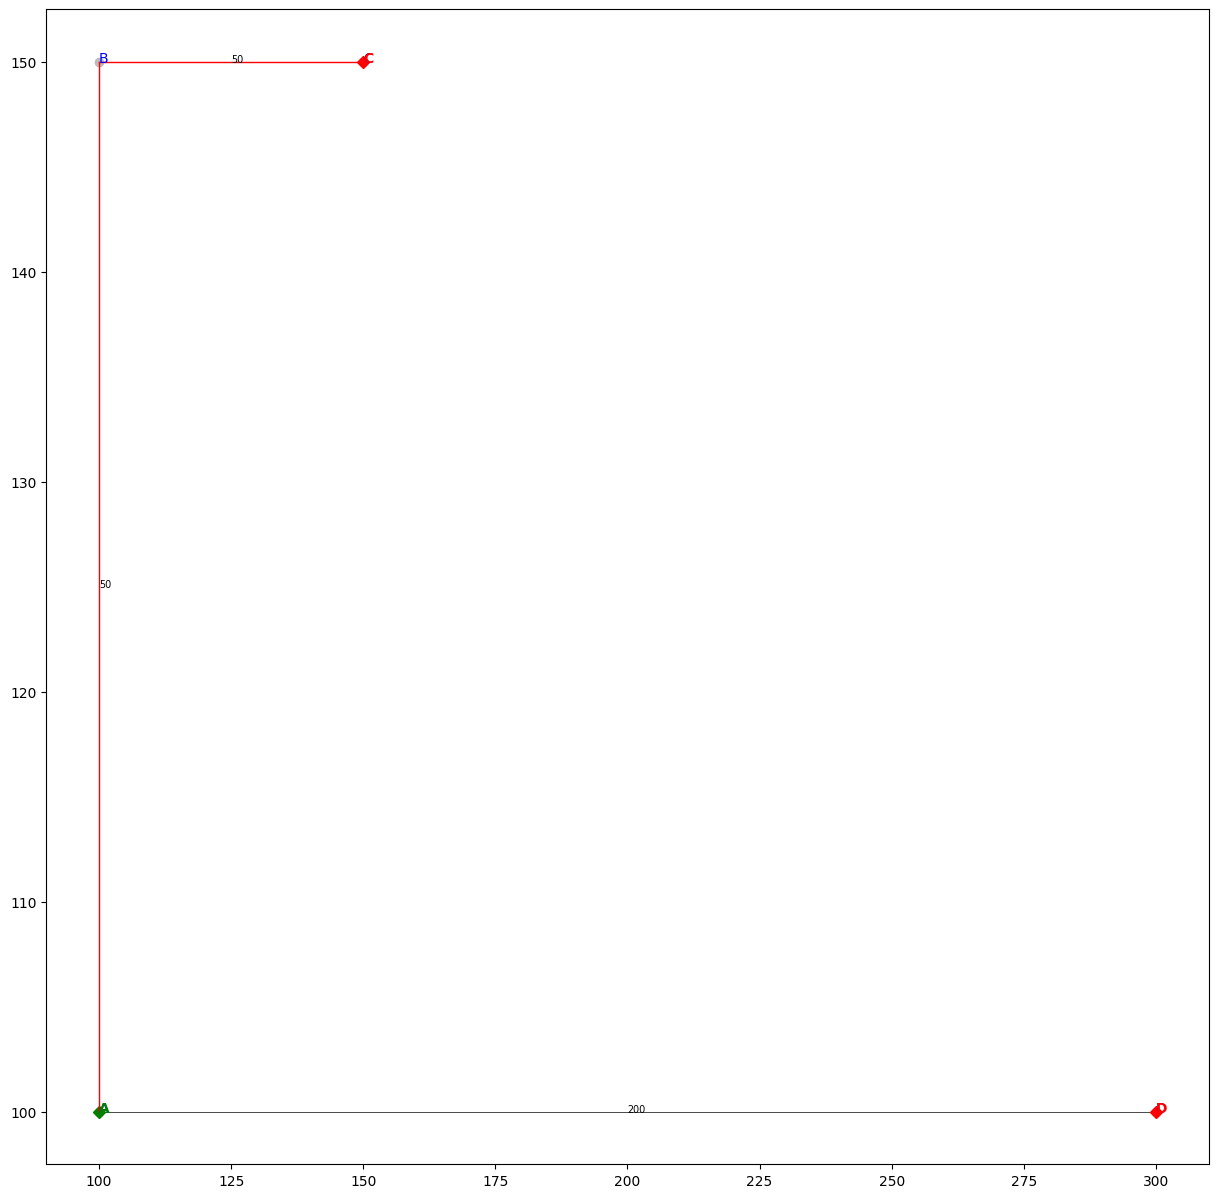

ENDED HERE:
LABEL: C
PATH: [(A, 0.00), (B, 100.00), (C, 100.00)]
COST: 100

STATS:
AVG_OPEN: 0.67
MAX_OPEN: 1.00

AVG_DEPTH: 2.00
MAX_DEPTH: 3.00

AVG_BRANCHING_FACTOR: 1.33


In [26]:
Searcher(graph, 'A*', 'A', ['C', 'D'], heuristic='SLD', graph_viz=graph_viz).search()

In [11]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.rcParams["figure.figsize"] = (15,15)

In [12]:
graph1_df = df.loc[df['Graph'] == graph1_fp]
graph2_df = df.loc[df['Graph'] == graph2_fp]

In [23]:
graph1_dfs = graph1_df.loc[graph1_df['Algorithm'] == 'DFS']

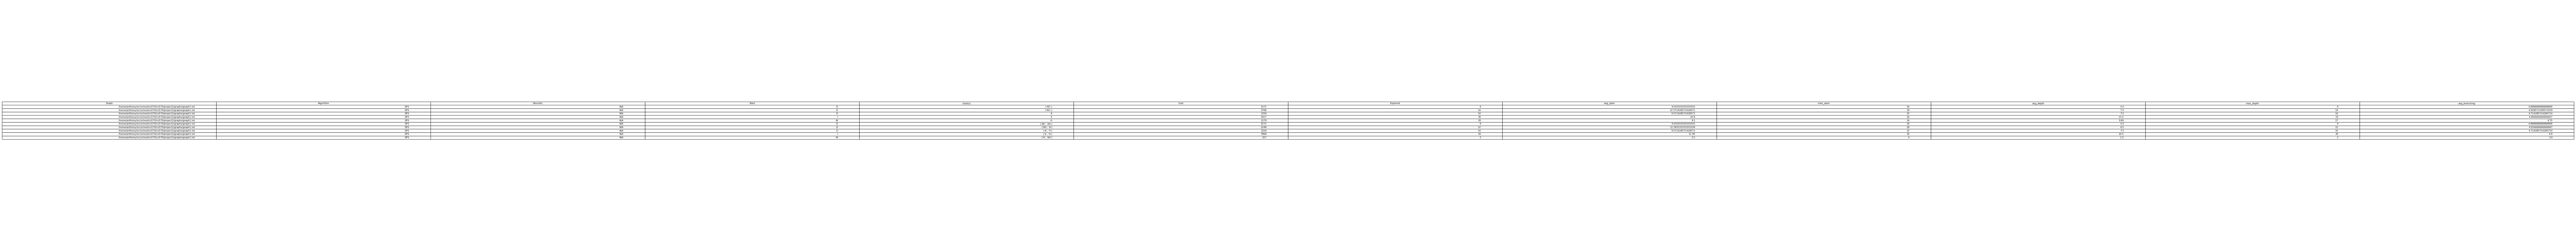

In [24]:
fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
t= ax.table(cellText=graph1_dfs.values, colWidths = [0.9]*len(graph1_dfs.columns),  colLabels=graph1_dfs.columns,  loc='center')
t.auto_set_font_size(False) 
t.set_fontsize(8)
fig.tight_layout()
plt.show()

In [13]:
BFS = df.loc[df['Algorithm'] == 'BFS']
BFS_avg = BFS[['Cost',
                'Explored',
                'avg_open',
                'max_open',
                'avg_depth',
                'max_depth',
                'avg_branching']].mean()
print(BFS_avg)

Cost             605.450000
Explored          26.850000
avg_open          12.612261
max_open          19.100000
avg_depth          2.793824
max_depth          3.650000
avg_branching      4.498180
dtype: float64


In [14]:
DFS = df.loc[df['Algorithm'] == 'DFS']
DFS_avg = DFS[['Cost',
                'Explored',
                'avg_open',
                'max_open',
                'avg_depth',
                'max_depth',
                'avg_branching']].mean()
print(DFS_avg)

Cost             2230.950000
Explored           15.850000
avg_open            8.388652
max_open           12.900000
avg_depth           8.191397
max_depth          14.950000
avg_branching       4.562144
dtype: float64


In [27]:
BEST = df.loc[df['Algorithm'] == 'BEST']
BEST_avg = BEST[['Cost',
                'Explored',
                'avg_open',
                'max_open',
                'avg_depth',
                'max_depth',
                'avg_branching']].mean()
print(BEST_avg)

Cost             514.450000
Explored           4.250000
avg_open           4.939167
max_open           9.050000
avg_depth          2.585714
max_depth          4.100000
avg_branching      3.814821
dtype: float64


In [16]:
IDS = df.loc[df['Algorithm'] == 'IDS']
IDS_avg = IDS[['Cost',
                'Explored',
                'avg_open',
                'max_open',
                'avg_depth',
                'max_depth',
                'avg_branching']].mean()
print(IDS_avg)

Cost             960.200000
Explored          17.950000
avg_open           8.850993
max_open          13.700000
avg_depth          3.980631
max_depth          6.050000
avg_branching      4.534257
dtype: float64


In [17]:
AStar = df.loc[df['Algorithm'] == 'A*']
SLD = AStar.loc[AStar['Heuristic'] == 'SLD']
SLD_avg = SLD[['Cost',
                'Explored',
                'avg_open',
                'max_open',
                'avg_depth',
                'max_depth',
                'avg_branching']].mean()
print(SLD_avg)

Cost             479.750000
Explored           8.850000
avg_open           6.804233
max_open          10.850000
avg_depth          2.677346
max_depth          4.350000
avg_branching      3.847199
dtype: float64


In [18]:
DIR = AStar.loc[AStar['Heuristic'] == 'DIR']
DIR_avg = DIR[['Cost',
                'Explored',
                'avg_open',
                'max_open',
                'avg_depth',
                'max_depth',
                'avg_branching']].mean()
print(DIR_avg)

Cost             550.500000
Explored           7.600000
avg_open           6.150740
max_open          10.200000
avg_depth          2.890843
max_depth          4.600000
avg_branching      3.874730
dtype: float64
